[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


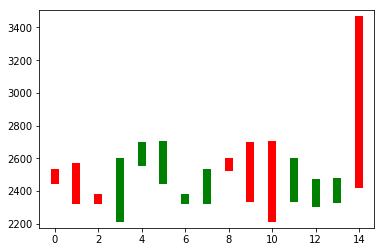

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2547.30,2356.74,2235.67,2577.89,2465.64,2345.78,2343.34,2577.67,2677.87,2678.34,2356.23,2324,2354,3444])
startPrice = np.array([2465.64,2345.78,2343.34,2577.67,2677.87,2678.34,2356.23,2511.90,2547.30,2356.74,2235.67,2577.89,2452,2456,2446])
print(date)
plt.figure()
for i in range(0,15):
    # 柱张图
    dateone = np.zeros([2])
    dateone[0] = i;
    dateone[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = startPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > startPrice[i]:
        plt.plot(dateone,priceOne,'r',lw = 8)
    else:
        plt.plot(dateone,priceOne,'g',lw = 8)
plt.show()

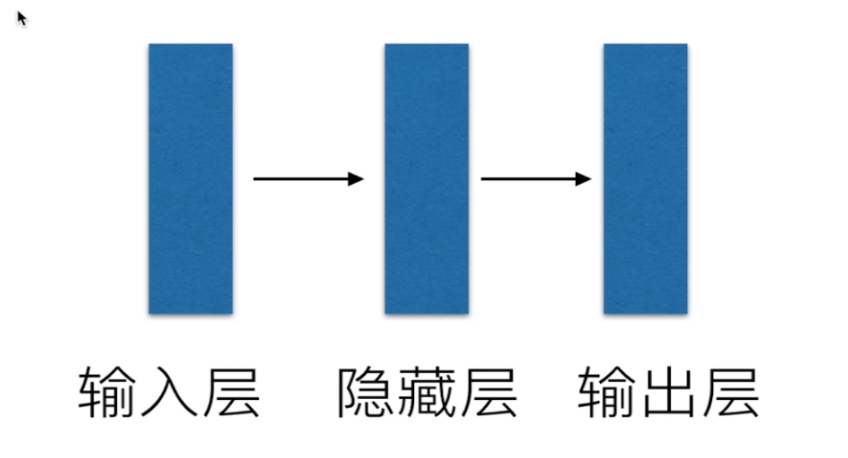

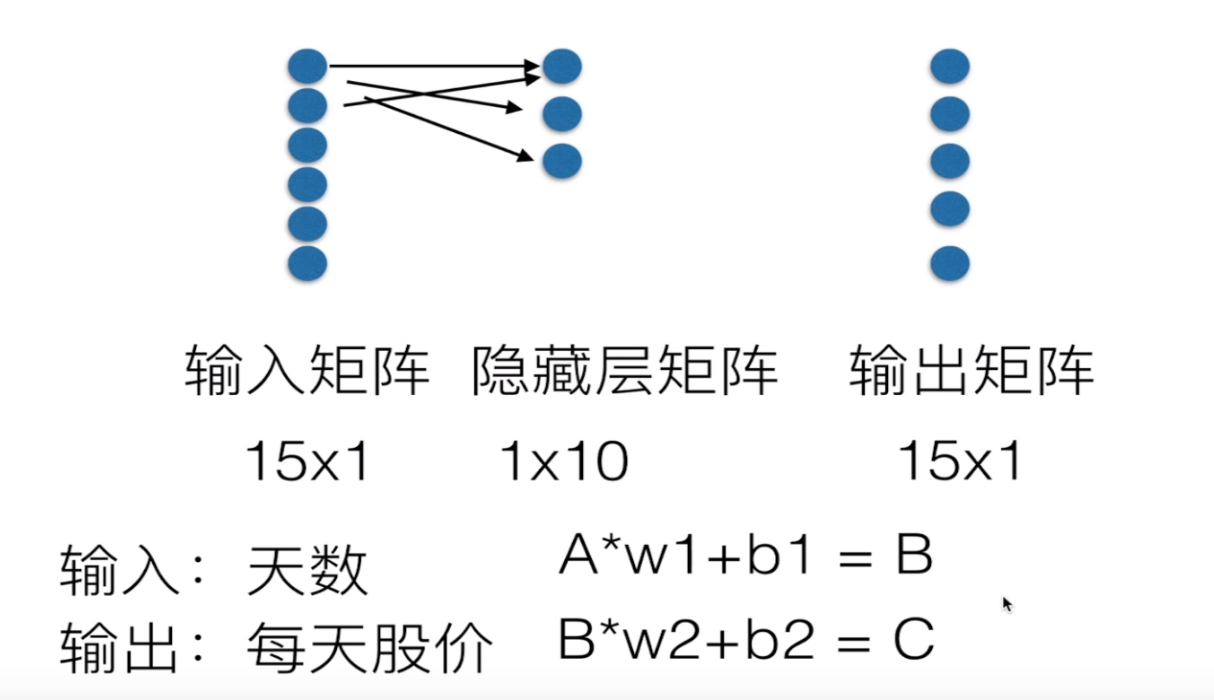

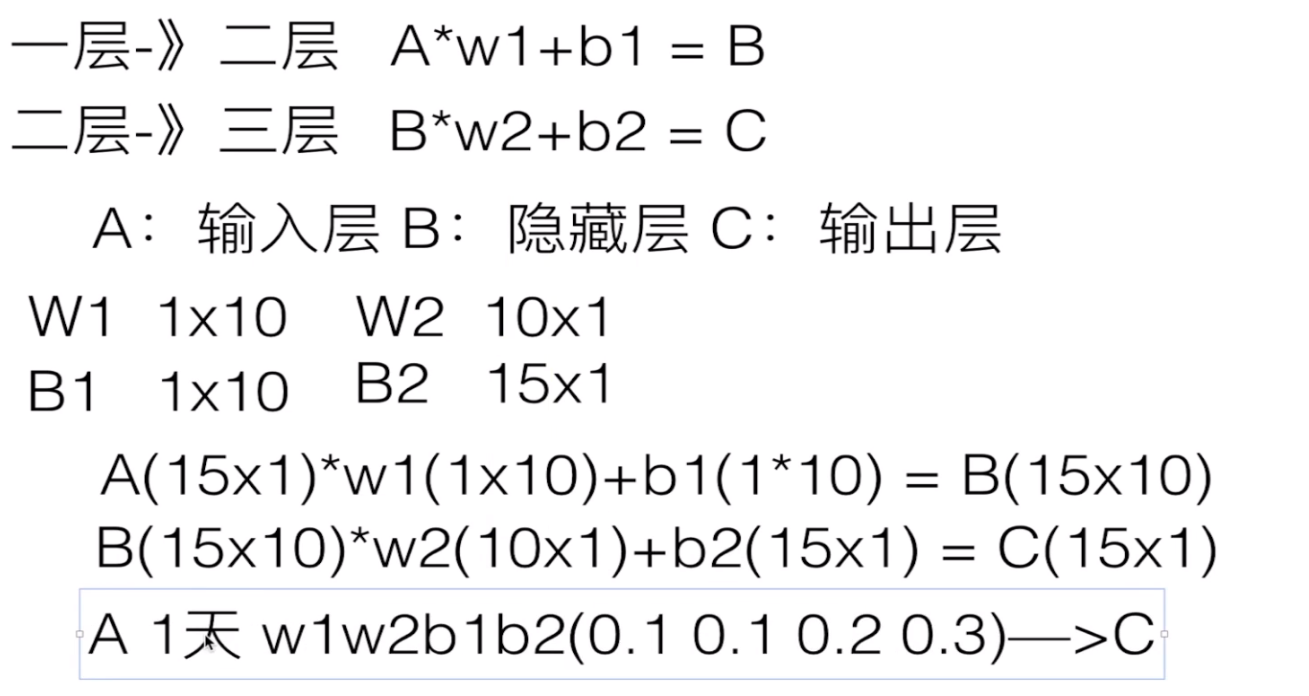

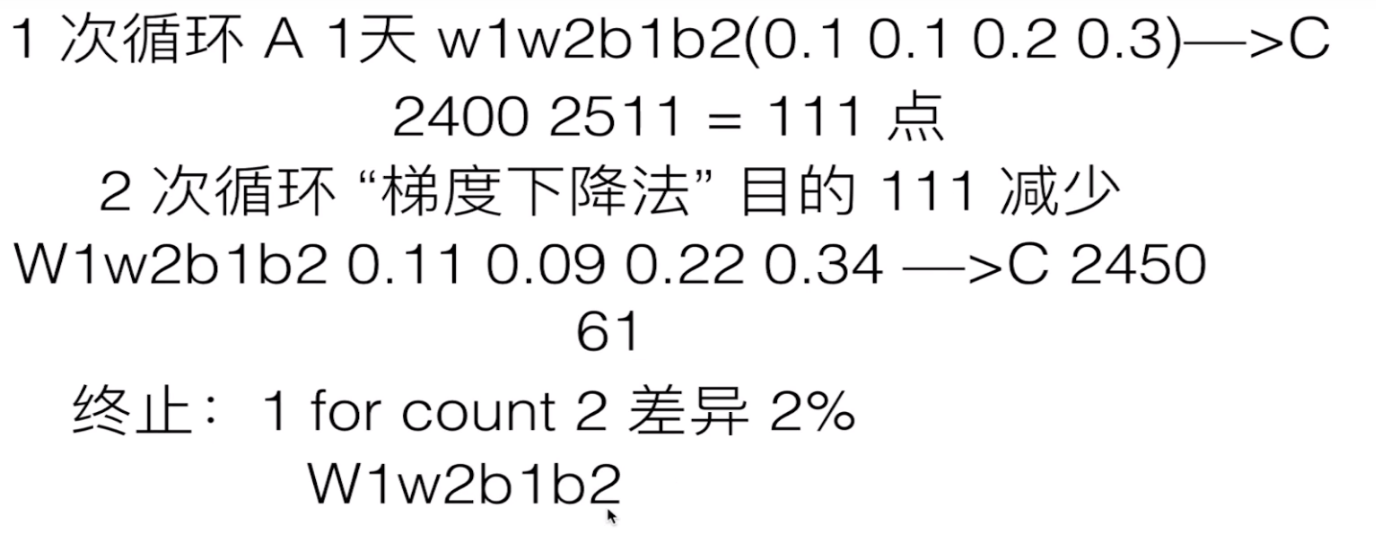

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


NameError: name 'b1' is not defined

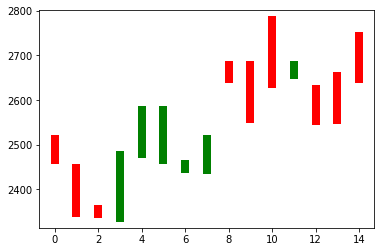

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2447.30,2356.74,2335.67,2477.89,2465.64,2445.78,2443.34,2677.67,2677.87,2778.34,2656.23,2624,2654,2744])
startPrice = np.array([2465.64,2345.78,2343.34,2477.67,2577.87,2578.34,2456.23,2511.90,2647.30,2556.74,2635.67,2677.89,2552,2556,2646])
print(date)
plt.figure()
for i in range(0,15):
    # 柱张图
    dateone = np.zeros([2])
    dateone[0] = i;
    dateone[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = startPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > startPrice[i]:
        plt.plot(dateone,priceOne,'r',lw = 8)
    else:
        plt.plot(dateone,priceOne,'g',lw = 8)
# plt.show()
# A(15x1)*w1(1x10)+b1(1x10) = B(15x10)
# B(15x10)*w2(10x1)+b2(15x1) =  C(15x1)
# 1 A B C
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal = i/14.0;
    priceNormal = endPrice[i]/3000.0;
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
# B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
bi = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1) + b1
layer1 = tf.matmul(x,w1)+ b1
layer1 = tf.nn.relu(wb1) #激励函数
# C
w2 = tf.Variable(tf.random.uniform([10,1],0,1))



[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


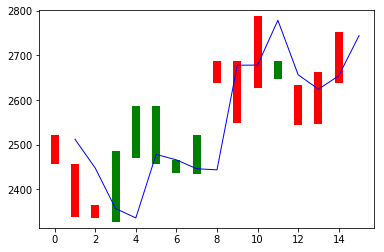

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2447.30,2356.74,2335.67,2477.89,2465.64,2445.78,2443.34,2677.67,2677.87,2778.34,2656.23,2624,2654,2744])
startPrice = np.array([2465.64,2345.78,2343.34,2477.67,2577.87,2578.34,2456.23,2511.90,2647.30,2556.74,2635.67,2677.89,2552,2556,2646])
print(date)
plt.figure()
for i in range(0,15):
    # 柱张图
    dateone = np.zeros([2])
    dateone[0] = i;
    dateone[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = startPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > startPrice[i]:
        plt.plot(dateone,priceOne,'r',lw = 8)
    else:
        plt.plot(dateone,priceOne,'g',lw = 8)
# plt.show()
# A(15x1)*w1(1x10)+b1(1x10) = B(15x10)
# B(15x10)*w2(10x1)+b2(15x1) =  C(15x1)
# 1 A B C
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal[i,0] = i/14.0;
    priceNormal[i,0] = endPrice[i]/3000.0;
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
# B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1) + b1
layer1 = tf.matmul(x,w1)+ b1
layer1 = tf.nn.relu(wb1) #激励函数
# C
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
loss = tf.reduce_mean(tf.square(y-layer2))# y 真实 layer2 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)#梯度下降法
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000):
        sess.run(train_step,feed_dict = {x:dateNormal,y:priceNormal})
    #w1 w2 b1 b2 A + wb -->layer2
    pred = sess.run(layer2,feed_dict = {x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0]=(pred * 3000)[i,0]
    plt.plot(date,predPrice,'b',lw =1)
plt.show()


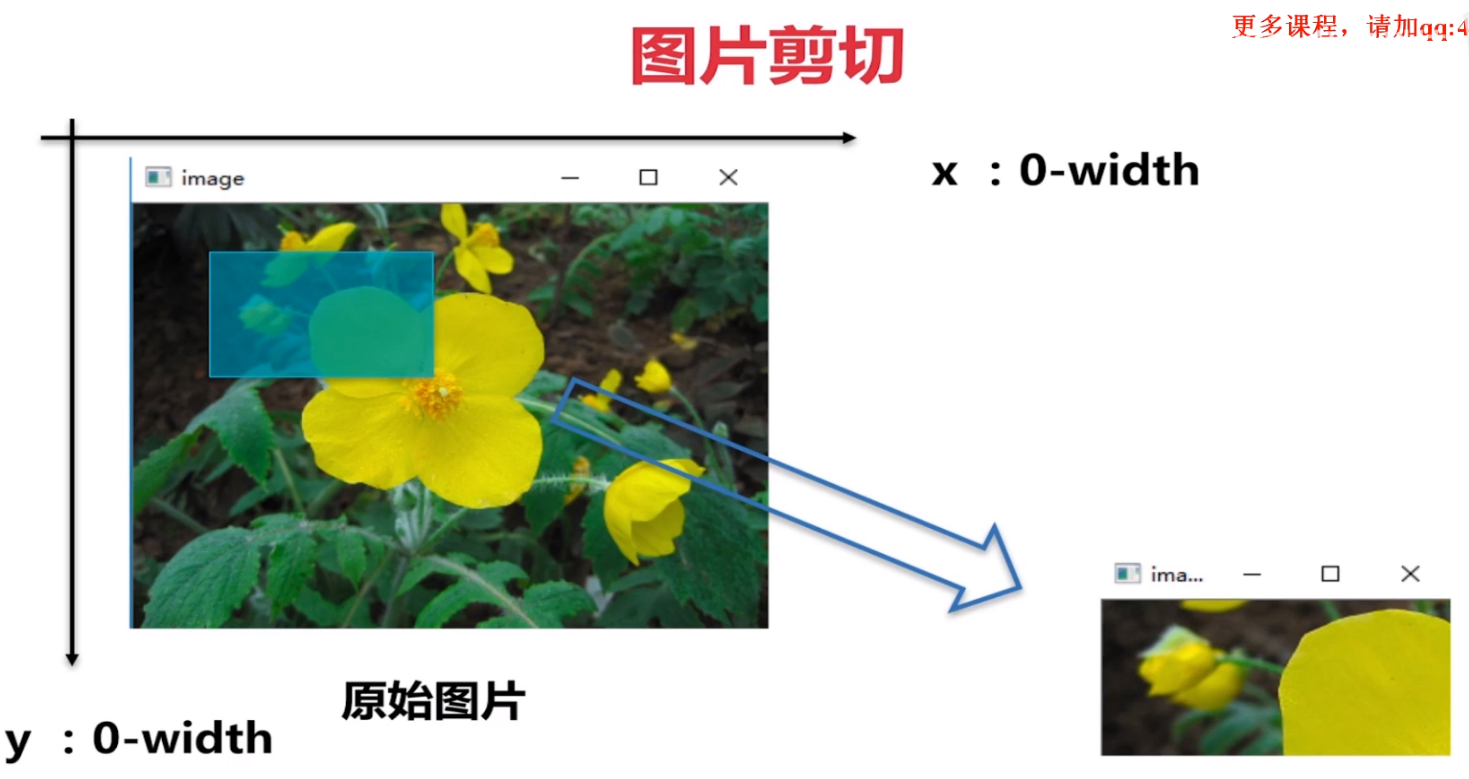